In [ ]:
#the statistics of the eclipse data

In [2]:
import pandas as pd
import os
import json
import csv
import re, datetime
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta

from lifelines import KaplanMeierFitter

from global_functions import *
from rq1_functions import *

In [7]:
df_full= pd.read_csv('./data/bugs_full.csv',index_col=False,dtype={'release':str,'version':str})


/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df_full_hist= pd.read_csv('./data/bug_history_orig.csv',index_col=False,dtype={'release':str,'version':str})
df_full_hist.head()

,added,id,removed,what,when,who
0,platform-help-inbox@eclipse.org,100001,pde-ui-inbox@eclipse.org,assigned_to,2005-06-14T16:16:00Z,wassim.melhem@gmail.com
1,Help,100001,UI,component,2005-06-14T16:16:00Z,wassim.melhem@gmail.com
2,Platform,100001,PDE,product,2005-06-14T16:16:00Z,wassim.melhem@gmail.com
3,konradk@ca.ibm.com,100001,NaN,cc,2005-06-14T17:17:31Z,konradk@ca.ibm.com
4,dejan@ca.ibm.com,100001,platform-help-inbox@eclipse.org,assigned_to,2005-06-14T17:17:31Z,konradk@ca.ibm.com


In [15]:
df_full_hist[df_full_hist['what']=='target_milestone'].added.unique().tolist()

['3.1 RC3',
 '3.1.1',
 '3.1 RC4',
 '3.2 M1',
 '3.2 M5',
 '3.2 M3',
 '3.2',
 '3.1 RC2',
 '3.2 M6',
 '---',
 '3.3 M5',
 '3.3 M1',
 '3.4 M4',
 '3.2 RC1',
 '3.1 M7',
 '3.8',
 '3.3',
 '3.4',
 '3.5',
 '3.1.2',
 '3.2 M2',
 '3.2 M4',
 '3.4 RC1',
 '3.4 M2',
 '3.1',
 '3.6 M7',
 '3.1 M2',
 '3.3 M6',
 '3.2.2',
 '4.3 M1',
 '3.6',
 '3.6 M1',
 '3.6 M2',
 '3.3 RC2',
 '3.1 M4',
 '3.2 RC3',
 '3.2 RC6',
 '3.3.2',
 '3.3 RC4',
 '3.5 M7',
 '3.4 M7',
 '3.2 RC5',
 '3.4 M3',
 '3.2 RC2',
 '3.7 M4',
 '3.4 M1',
 '3.4 M5',
 '1.0 M8',
 '3.5 M1',
 '3.3 M3',
 '3.2 RC4',
 '4.1',
 '4.0i4',
 '4.1i2',
 '3.3 M4',
 '3.4 RC3',
 '3.4.1',
 '3.7 M6',
 '3.3 M7',
 '3.4 RC2',
 '1.0 M6',
 '3.3 RC1',
 '3.4 M6',
 '3.6 M4',
 '3.6 M5',
 '3.6 M6',
 '3.5 M6',
 '4.4 M7',
 '3.5 M2',
 '3.5 RC1',
 '3.8 M2',
 '3.5 M4',
 '3.2.1',
 '4.4 M2',
 '4.4 M3',
 '4.4 M4',
 '1.1',
 '4.4',
 '4.4 M1',
 '3.3 M2',
 '4.0',
 '1.0 M9',
 '4.1i1',
 '3.6 M3',
 '3.6 RC1',
 '3.4.2',
 '3.2 RC7',
 '3.5 M5',
 '4.5',
 '3.7 M5',
 '4.2 M5',
 '4.2 M6',
 '4.2 M7',
 '4.7 M6

In [6]:
df_full[['id','version','target_milestone']]

,id,version,target_milestone
0,475361,4.5,4.6 M2
1,475365,4.6,4.6 M2
2,475370,4.5,---
3,475379,4.5,---
4,475407,4.5,---
5,475427,4.5,4.6 M3
6,475471,4.6,---
7,475478,4.6,4.6 M4
8,475479,4.6,---
9,475480,4.5,4.5.2


In [5]:
df_full.columns

Index(['alias', 'assigned_to', 'assigned_to_detail.email',
       'assigned_to_detail.id', 'assigned_to_detail.name',
       'assigned_to_detail.real_name', 'blocks', 'cc', 'cc_detail',
       'classification', 'component', 'creation_time', 'creator',
       'creator_detail.email', 'creator_detail.id', 'creator_detail.name',
       'creator_detail.real_name', 'deadline', 'depends_on', 'dupe_of',
       'flags', 'groups', 'id', 'is_cc_accessible', 'is_confirmed',
       'is_creator_accessible', 'is_open', 'keywords', 'last_change_time',
       'op_sys', 'platform', 'priority', 'product', 'qa_contact',
       'qa_contact_detail.email', 'qa_contact_detail.id',
       'qa_contact_detail.name', 'qa_contact_detail.real_name', 'resolution',
       'see_also', 'severity', 'status', 'summary', 'target_milestone', 'url',
       'version', 'whiteboard'],
      dtype='object')

In [3]:
yearly_file = '.'+os.sep+'data'+os.sep+'bugs_info.csv'
df = pd.read_csv(yearly_file,index_col=False,dtype={'release':str,'version':str})
df = df.fillna('')
df['release'] = df.apply(lambda x : str(assign_to_closest_minor(x['version'])), axis=1)
df['release'] = df['release'].astype(str)
df = trans_to_datetime(df,['creation_time','first_assignment_date','last_assignment_date',
                          'first_resolved_date','last_resolved_date',
                           'first_fixed_date','last_fixed_date'])

df = attach_severity_priority_to_dataframe(df)
df.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


,id,release,Product,creation_time,version,resolution,is_assigned,is_resolved,is_fixed,first_assignment_date,...,last_fixed_date,time_assign_diff,time_resolve_diff,time_fix_diff,min_release,max_release,min_release_before_version_field,min_release_after_version_field,severity,priority
0,475361,4.5,Platform,2015-08-19 10:50:25,4.5,FIXED,0,1,1,NaT,...,2015-08-19 11:53:03,,0,0,4.5,4.5,False,False,normal,P3
1,475365,4.6,Platform,2015-08-19 11:34:37,4.6,FIXED,0,1,1,NaT,...,2015-08-26 14:29:30,,0,0,4.6,4.6,False,False,minor,P3
2,475370,4.5,Platform,2015-08-19 12:09:06,4.5,DUPLICATE,0,0,0,NaT,...,NaT,,,,4.5,4.5,False,False,minor,P3
3,475379,4.5,Platform,2015-08-19 13:39:12,4.5,,0,0,0,NaT,...,NaT,,,,4.5,4.5,False,False,normal,P3
4,475407,4.5,Platform,2015-08-19 17:06:10,4.5,FIXED,0,1,1,NaT,...,2015-08-19 17:15:25,,0,0,4.5,4.5,False,False,normal,P3


In [2]:
relase_creation_ts_all = get_release_dates()

yearly_releases = get_yearly_releases()

relase_creation_ts_rolling = get_rolling_releases()

In [3]:
yearly_file = '.'+os.sep+'data'+os.sep+'bugs_info.csv'
df = pd.read_csv(yearly_file,index_col=False,dtype={'release':str,'version':str})
df = df.fillna('')
df['release'] = df.apply(lambda x : str(assign_to_closest_minor(x['version'])), axis=1)
df['release'] = df['release'].astype(str)
df = trans_to_datetime(df,['creation_time','first_assignment_date','last_assignment_date',
                          'first_resolved_date','last_resolved_date',
                           'first_fixed_date','last_fixed_date'])

df = attach_severity_priority_to_dataframe(df)
df.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


,id,release,Product,creation_time,version,resolution,is_assigned,is_resolved,is_fixed,first_assignment_date,...,last_fixed_date,time_assign_diff,time_resolve_diff,time_fix_diff,min_release,max_release,min_release_before_version_field,min_release_after_version_field,severity,priority
0,475361,4.5,Platform,2015-08-19 10:50:25,4.5,FIXED,0,1,1,NaT,...,2015-08-19 11:53:03,,0,0,4.5,4.5,False,False,normal,P3
1,475365,4.6,Platform,2015-08-19 11:34:37,4.6,FIXED,0,1,1,NaT,...,2015-08-26 14:29:30,,0,0,4.6,4.6,False,False,minor,P3
2,475370,4.5,Platform,2015-08-19 12:09:06,4.5,DUPLICATE,0,0,0,NaT,...,NaT,,,,4.5,4.5,False,False,minor,P3
3,475379,4.5,Platform,2015-08-19 13:39:12,4.5,,0,0,0,NaT,...,NaT,,,,4.5,4.5,False,False,normal,P3
4,475407,4.5,Platform,2015-08-19 17:06:10,4.5,FIXED,0,1,1,NaT,...,2015-08-19 17:15:25,,0,0,4.5,4.5,False,False,normal,P3


In [4]:
df.release.unique()

array(['4.5', '4.6', '4.4', '3.7', '4.2', '4.3', '3.6', '4.8', '3.1',
       '4.7', '4.10', '3.4', '3.5', '3.3', '3.2', '3.0', '4.9'],
      dtype=object)

In [5]:
from scipy import stats

def compare_distributions(tt,var1,var2):         
    normal_test_var1 = stats.kstest(tt[var1].values.tolist(), 'norm')
    normal_test_var2 = stats.kstest(tt[var2].values.tolist(), 'norm')
    
    tt[[var1, var2]].plot(kind='box')
    
    #not normal distribution
    if normal_test_var1.pvalue<0.05 or  normal_test_var2.pvalue<0.05:
        print('At least one sample not normally distributed')
        #wilkoxon
        wresult = stats.ranksums(tt[var1], tt[var2])
        
        if wresult.pvalue<0.05:
            print('Statistically significant difference found')
        else:
            print('Statistically significant difference NOT found')
        print(wresult)
    else:
        print('Both samples are normally distributed')
        #t-test
        tresult = stats.ttest_rel(tt[var1], tt[var2])

        if tresult.pvalue<0.05:
            print('Statistically significant difference found')
        else:
            print('Statistically significant difference NOT found')
        print(tresult)

# Yearly releases analysis

In [6]:
target_file = '.'+os.sep+'data'+os.sep+'RQ1'+os.sep+'year_releases_yearly_stats_first_assign_last_resolve_fix.csv'
if not os.path.exists(target_file):
    df_yearly_stats_first = get_general_statistics_per_relase(df,assignedFirst=True,resolvedFirst=False,fixedFirst=False)
    df_yearly_stats_first.to_csv(target_file,index=False)
else:
    df_yearly_stats_first = pd.read_csv(target_file,index_col=False,
                                       dtype={'version': str})
    
df_yearly_stats_first = sort_df(df_yearly_stats_first,'version')
df_yearly_stats_first

,version,RAFA,RARA,RBFA,RBFB,RBRA,RBRB,Ratio_F_A,Ratio_F_B,Ratio_R_A,Ratio_R_B,after_release,before_release,total
0,3.0,2804.0,6551.0,1321.0,7870.0,3324.0,14213.0,0.428026,0.553718,0.939885,0.791061,6970.0,17967.0,24937.0
1,3.1,2069.0,5198.0,715.0,4857.0,1911.0,8163.0,0.398038,0.595002,0.909059,0.669647,5718.0,12190.0,17908.0
2,3.2,1829.0,4696.0,996.0,4525.0,2294.0,7360.0,0.389480,0.614810,0.877101,0.702290,5354.0,10480.0,15834.0
3,3.3,1778.0,3681.0,817.0,3847.0,1442.0,5730.0,0.483021,0.671379,0.809011,0.708107,4550.0,8092.0,12642.0
4,3.4,1749.0,3548.0,767.0,3870.0,1349.0,5456.0,0.492954,0.709311,0.774842,0.687933,4579.0,7931.0,12510.0
5,3.5,994.0,1666.0,546.0,3386.0,847.0,4767.0,0.596639,0.710300,0.617266,0.701236,2699.0,6798.0,9497.0
6,3.6,772.0,1262.0,363.0,2235.0,520.0,2565.0,0.611727,0.871345,0.550611,0.567729,2292.0,4518.0,6810.0
7,3.7,750.0,1111.0,227.0,1426.0,325.0,1728.0,0.675068,0.825231,0.567706,0.590769,1957.0,2925.0,4882.0
8,4.2,1433.0,2015.0,361.0,1263.0,514.0,1642.0,0.711166,0.769184,0.543420,0.473882,3708.0,3465.0,7173.0
9,4.3,648.0,997.0,241.0,745.0,337.0,969.0,0.649950,0.768834,0.546601,0.507330,1824.0,1910.0,3734.0


In [7]:
target_file1 = '.'+os.sep+'data'+os.sep+'RQ1'+os.sep+'severity_year_releases_yearly_stats_first_assign_last_resolve_fix.csv'
if not os.path.exists(target_file1):
    sev_df_yearly_stats_first = get_general_statistics_per_relase_per_severity(df,assignedFirst=True,resolvedFirst=False,fixedFirst=False)
    sev_df_yearly_stats_first.to_csv(target_file1,index=False)
else:
    sev_df_yearly_stats_first = pd.read_csv(target_file1,index_col=False,
                                       dtype={'version': str})
    
sev_df_yearly_stats_first = sort_df(sev_df_yearly_stats_first,'version')
sev_df_yearly_stats_first

,version,RAFA,RARA,RBFA,RBFB,RBRA,RBRB,Ratio_F_A,Ratio_F_B,Ratio_R_A,Ratio_R_B,after_release,before_release,severity,total
0,3.0,2231.0,5021.0,1053.0,6099.0,2644.0,10981.0,0.444334,0.555414,0.939558,0.784974,5344.0,13989.0,normal,19333.0
1,3.0,247.0,658.0,109.0,878.0,299.0,1563.0,0.375380,0.561740,0.949495,0.834490,693.0,1873.0,major,2566.0
2,3.0,149.0,371.0,109.0,251.0,247.0,515.0,0.401617,0.487379,0.902676,0.636588,411.0,809.0,minor,1220.0
3,3.0,57.0,101.0,37.0,165.0,90.0,234.0,0.564356,0.705128,0.952830,0.704819,106.0,332.0,trivial,438.0
4,3.0,82.0,269.0,9.0,362.0,34.0,671.0,0.304833,0.539493,0.964158,0.951773,279.0,705.0,critical,984.0
5,3.0,38.0,131.0,4.0,115.0,10.0,249.0,0.290076,0.461847,0.956204,0.961390,137.0,259.0,blocker,396.0
6,3.0,2231.0,5021.0,1053.0,6099.0,2644.0,10981.0,0.444334,0.555414,0.939558,0.784974,5344.0,13989.0,normal,19333.0
7,3.0,247.0,658.0,109.0,878.0,299.0,1563.0,0.375380,0.561740,0.949495,0.834490,693.0,1873.0,major,2566.0
8,3.0,149.0,371.0,109.0,251.0,247.0,515.0,0.401617,0.487379,0.902676,0.636588,411.0,809.0,minor,1220.0
9,3.0,57.0,101.0,37.0,165.0,90.0,234.0,0.564356,0.705128,0.952830,0.704819,106.0,332.0,trivial,438.0


At least one sample not normally distributed
Statistically significant difference NOT found
RanksumsResult(statistic=-0.1894394259253035, pvalue=0.8497484264409991)


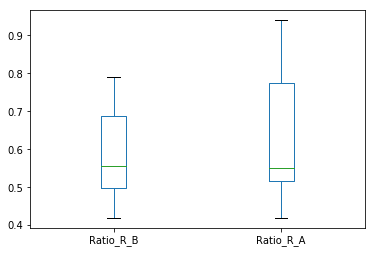

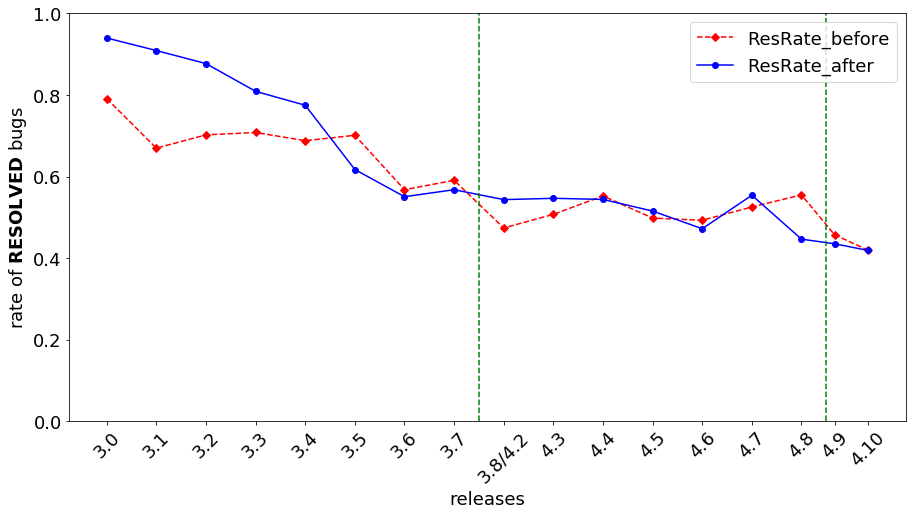

In [8]:

data = df_yearly_stats_first.copy()

compare_distributions(data,'Ratio_R_B','Ratio_R_A')

x = get_x_axis_tick_placement()

fig, ax = plt.subplots()

data = sort_df(data,'version')

data['label'] = ''
for index,row in data.iterrows():
    rel = row['version']
    date = relase_creation_ts_all[rel]
    date = date[:date.find(' ')]
    date = date[:date.rfind('-')]
    if rel=='4.2':
        rel='3.8/4.2'
    data.loc[index,'label'] = rel
data = data.set_index('version')
fig.set_figheight(7.5)
fig.set_figwidth(15)

ax.plot(x,data[['Ratio_R_B']],label='ResRate_before',color='red',marker='D',linestyle='--')
ax.plot(x,data[['Ratio_R_A']],label='ResRate_after',color='blue',marker='o',linestyle='-')

ax.legend(fontsize=18,loc=1)
plt.xlabel('releases', fontsize=18)
plt.ylabel('rate of ' + r"$\it{" + r"\bf{"+ 'RESOLVED' +  "}"+ "}$" + ' bugs', fontsize=18)

plt.axvline(x=14.5, c='g',linestyle='--')
plt.axvline(x=7.5, c='g',linestyle='--')

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
    tick.label.set_rotation(45)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
plt.xticks(x, data.label.values.tolist())
plt.ylim(0,1)
plt.show()
ax.get_figure().savefig('..'+os.sep+'paper'+os.sep+'figs'+os.sep+'rq1_res_before_after.pdf', bbox_inches="tight")

In [9]:
sev_df_yearly_stats_first.head()

,version,RAFA,RARA,RBFA,RBFB,RBRA,RBRB,Ratio_F_A,Ratio_F_B,Ratio_R_A,Ratio_R_B,after_release,before_release,severity,total
0,3.0,2231.0,5021.0,1053.0,6099.0,2644.0,10981.0,0.444334,0.555414,0.939558,0.784974,5344.0,13989.0,normal,19333.0
1,3.0,247.0,658.0,109.0,878.0,299.0,1563.0,0.375380,0.561740,0.949495,0.834490,693.0,1873.0,major,2566.0
2,3.0,149.0,371.0,109.0,251.0,247.0,515.0,0.401617,0.487379,0.902676,0.636588,411.0,809.0,minor,1220.0
3,3.0,57.0,101.0,37.0,165.0,90.0,234.0,0.564356,0.705128,0.952830,0.704819,106.0,332.0,trivial,438.0
4,3.0,82.0,269.0,9.0,362.0,34.0,671.0,0.304833,0.539493,0.964158,0.951773,279.0,705.0,critical,984.0


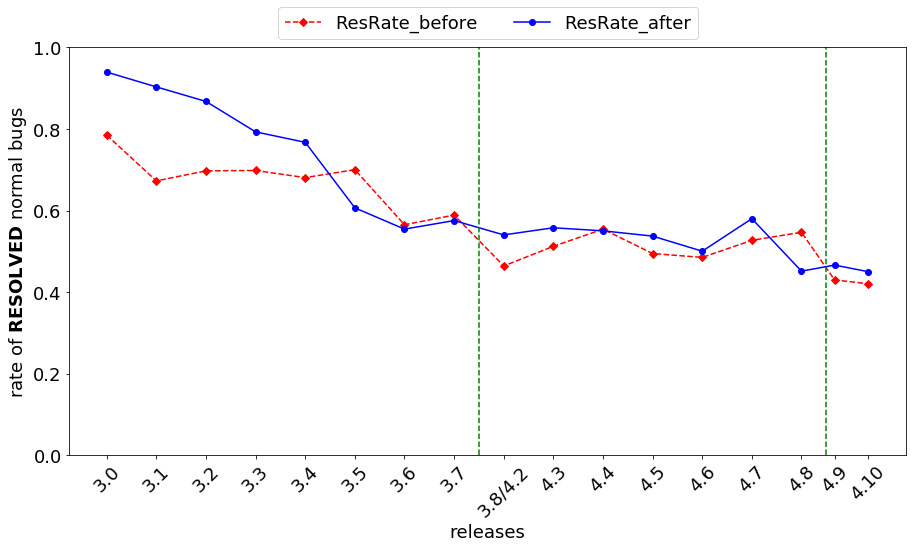

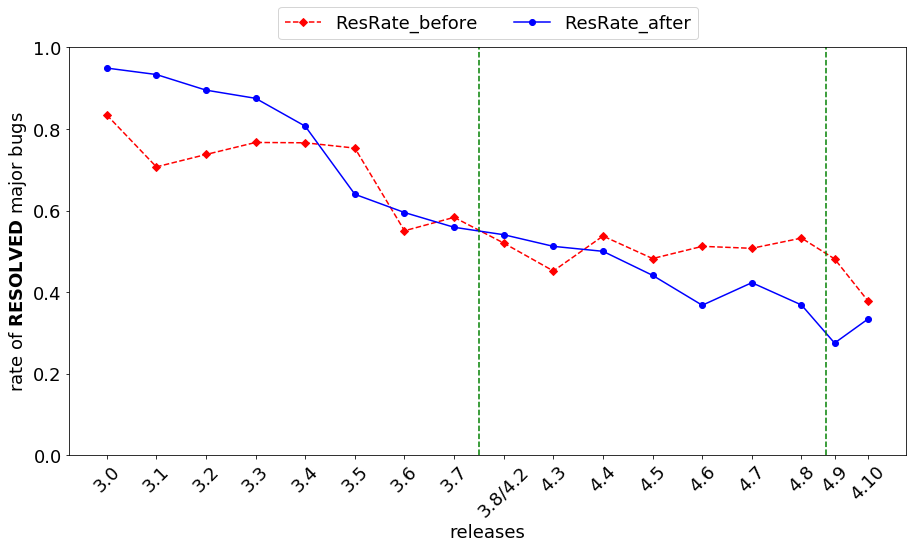

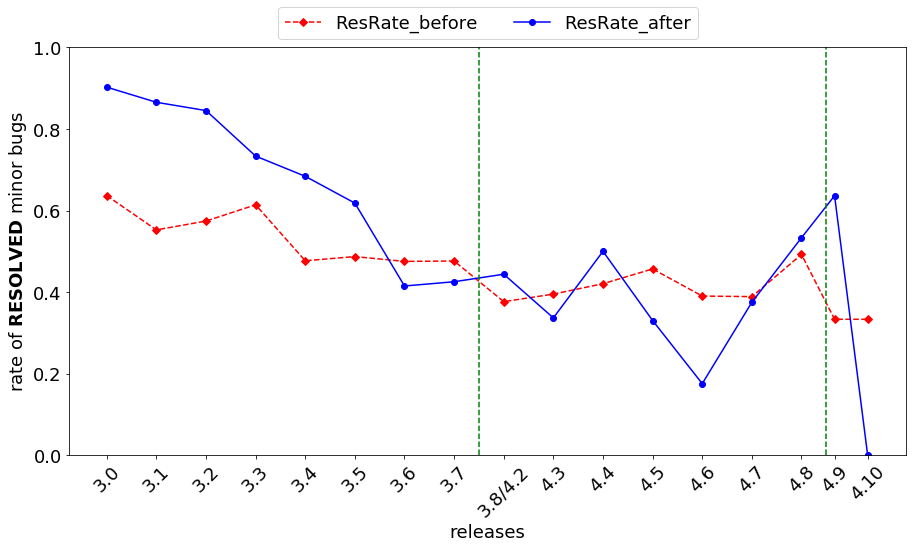

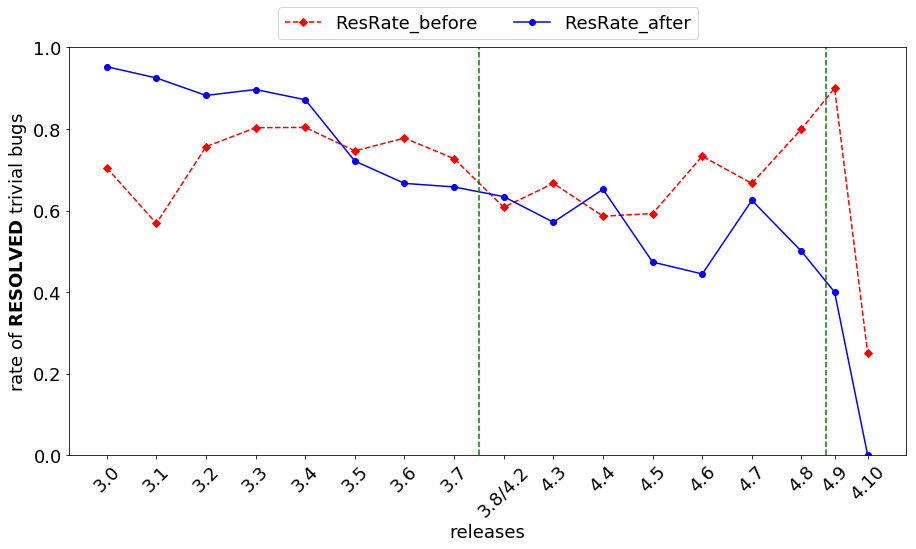

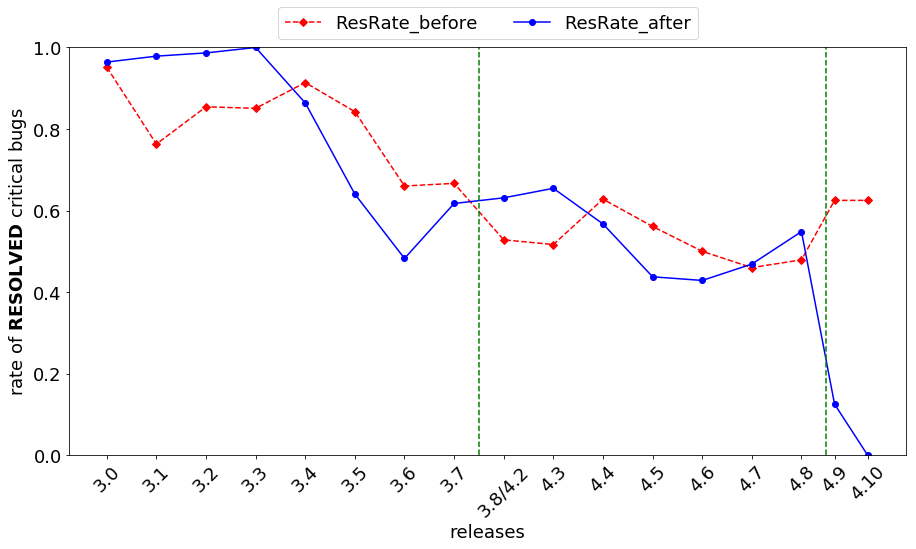

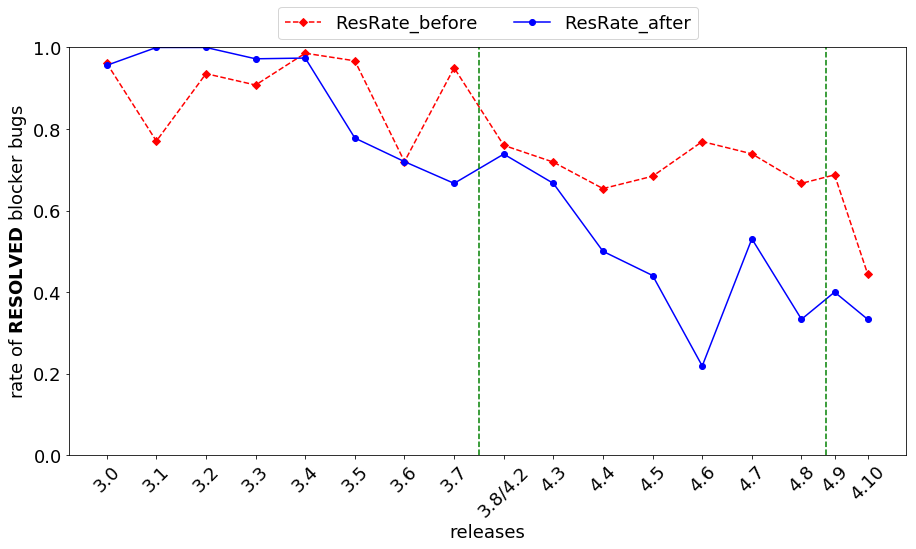

In [10]:
tdata = sev_df_yearly_stats_first.copy()
tdata = tdata.drop_duplicates()

x = get_x_axis_tick_placement()

for severity in tdata.severity.unique():
    fig, ax = plt.subplots()
    
    data = tdata[tdata['severity']==severity]

    data = sort_df(data,'version')

    data['label'] = ''
    for index,row in data.iterrows():
        rel = row['version']
        date = relase_creation_ts_all[rel]
        date = date[:date.find(' ')]
        date = date[:date.rfind('-')]
        if rel=='4.2':
            rel='3.8/4.2'
        data.loc[index,'label'] = rel

    data = data.set_index('version')
    fig.set_figheight(7.5)
    fig.set_figwidth(15)

    ax.plot(x,data[['Ratio_R_B']],label='ResRate_before',color='red',marker='D',linestyle='--')
    ax.plot(x,data[['Ratio_R_A']],label='ResRate_after',color='blue',marker='o',linestyle='-')

    ax.legend(fontsize=18, bbox_to_anchor=(0.25, 1.10), loc=2, ncol=2, borderaxespad=0.)
    plt.xlabel('releases', fontsize=18)
    plt.ylabel('rate of ' + r"$\it{" + r"\bf{"+ 'RESOLVED' +  "}"+ "}$" +' '+ severity + ' bugs', fontsize=18)

    plt.axvline(x=14.5, c='g',linestyle='--')
    plt.axvline(x=7.5, c='g',linestyle='--')

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(18) 
        tick.label.set_rotation(45)

    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(18) 
    plt.xticks(x, data.label.values.tolist())
    plt.ylim(0,1)
    plt.show()
    ax.get_figure().savefig('..'+os.sep+'paper'+os.sep+'figs'+os.sep+'RQ1'+os.sep+'res_before_after_sev='+str(severity)+'.pdf', bbox_inches="tight")

At least one sample not normally distributed
Statistically significant difference found
RanksumsResult(statistic=2.3249384090832703, pvalue=0.020075253803708427)


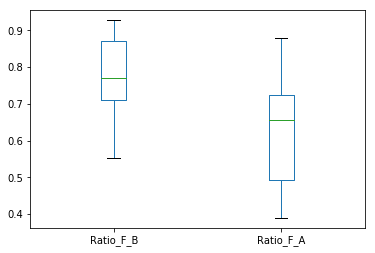

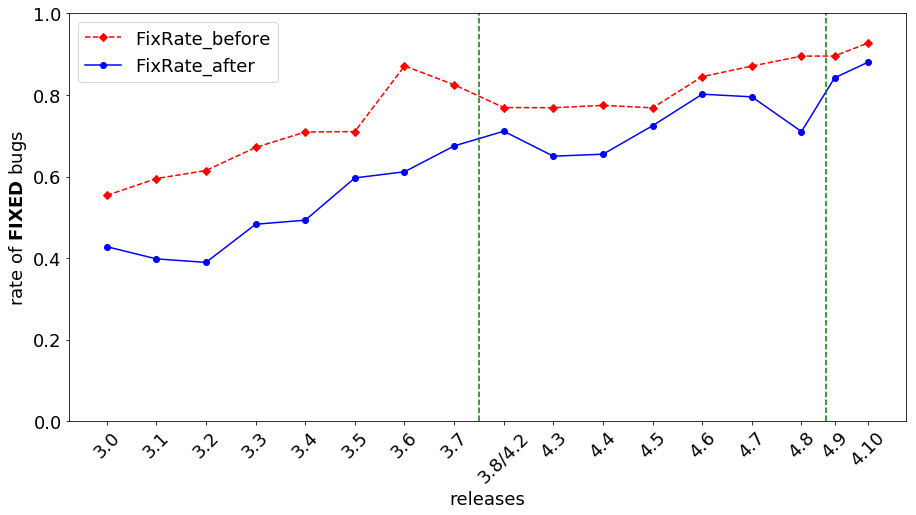

In [11]:
data = df_yearly_stats_first.copy()

compare_distributions(data,'Ratio_F_B','Ratio_F_A')

x = get_x_axis_tick_placement()

fig, ax = plt.subplots()

data = sort_df(data,'version')

data['label'] = ''
for index,row in data.iterrows():
    rel = row['version']
    date = relase_creation_ts_all[rel]
    date = date[:date.find(' ')]
    date = date[:date.rfind('-')]
    #stats2.loc[index,'label'] = rel+' ('+date+')'
    #stats2.loc[index,'label'] = date+' - '+rel
    if rel=='4.2':
        rel='3.8/4.2'
    data.loc[index,'label'] = rel
data = data.set_index('version')
fig.set_figheight(7.5)
fig.set_figwidth(15)

ax.plot(x,data[['Ratio_F_B']],label='FixRate_before',color='red',marker='D',linestyle='--')
ax.plot(x,data[['Ratio_F_A']],label='FixRate_after',color='blue',marker='o',linestyle='-')

ax.legend(fontsize=18)
plt.xlabel('releases', fontsize=18)
plt.ylabel('rate of ' + r"$\it{" + r"\bf{"+ 'FIXED' +  "}"+ "}$" + ' bugs', fontsize=18)

plt.axvline(x=14.5, c='g',linestyle='--')
plt.axvline(x=7.5, c='g',linestyle='--')

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
    tick.label.set_rotation(45)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
plt.xticks(x, data.label.values.tolist())
plt.ylim(0,1)
plt.show()
ax.get_figure().savefig('..'+os.sep+'paper'+os.sep+'figs'+os.sep+'rq1_fix_before_after.pdf', bbox_inches="tight")

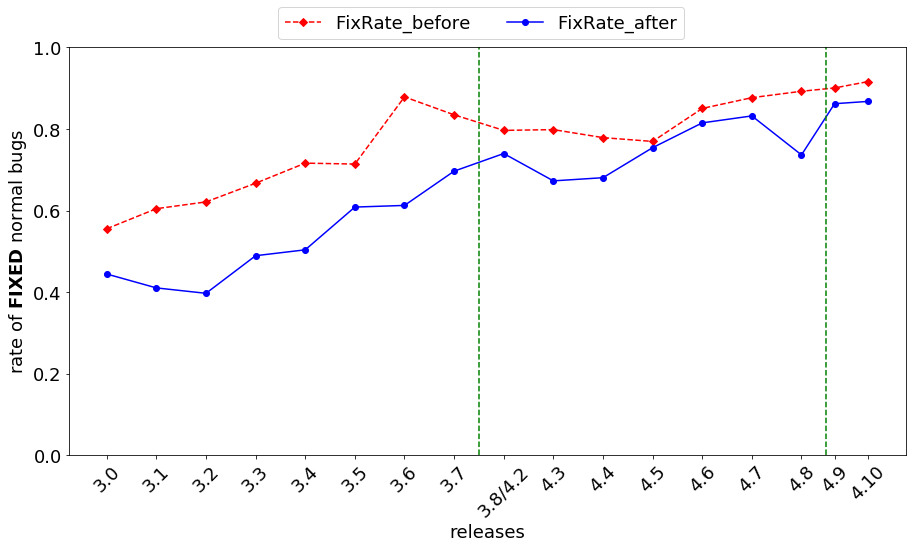

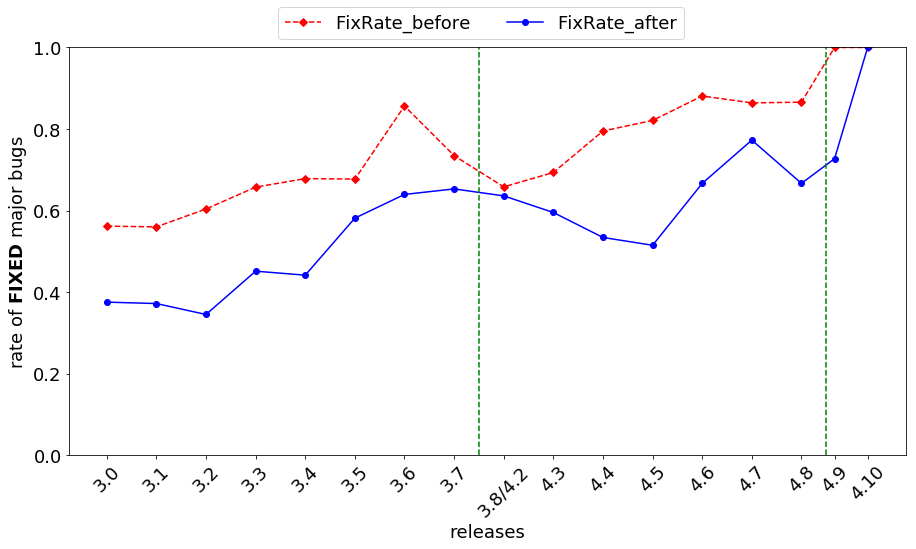

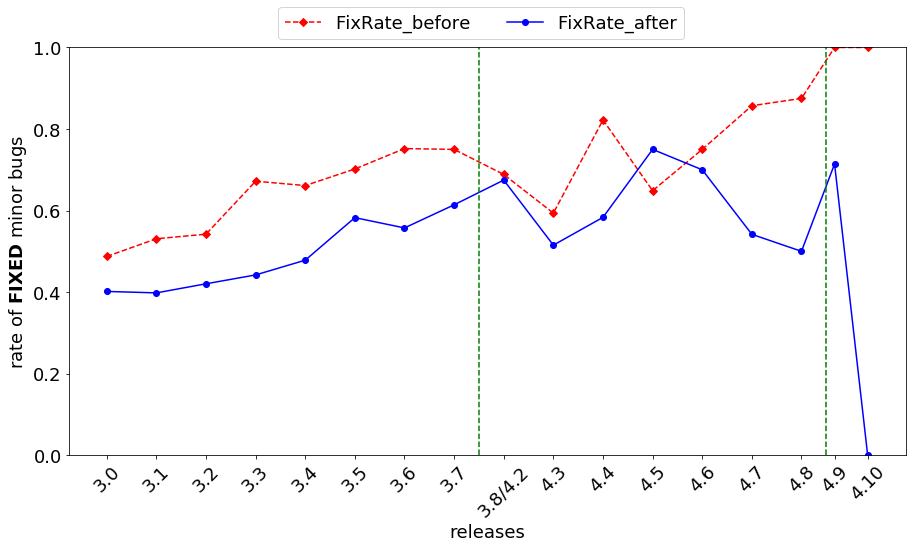

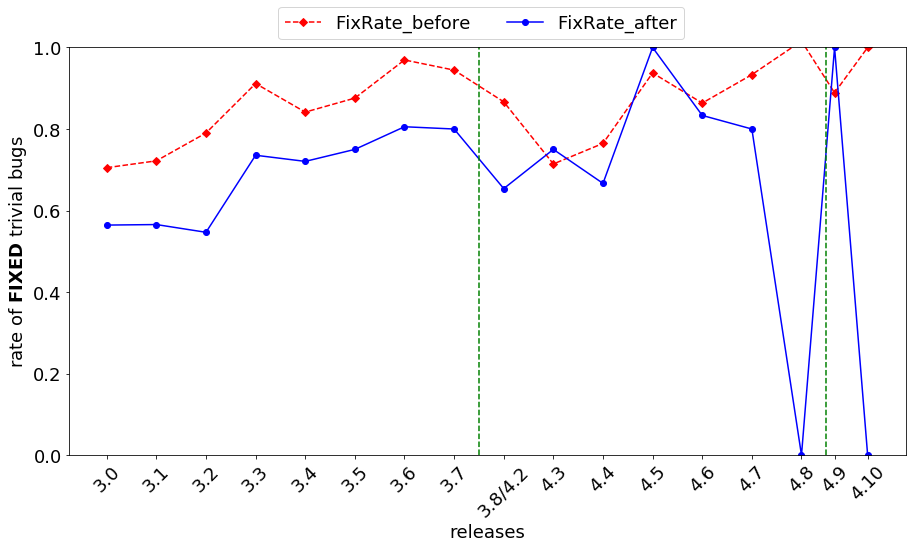

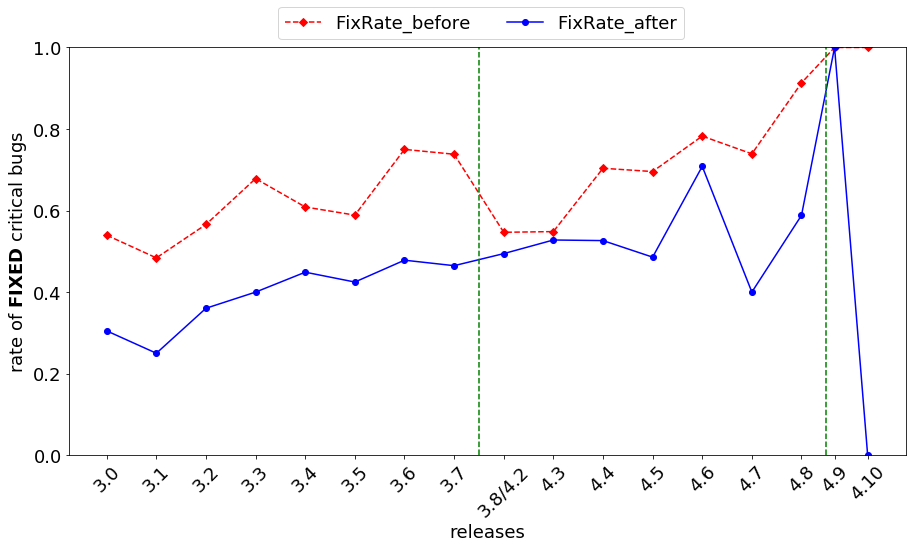

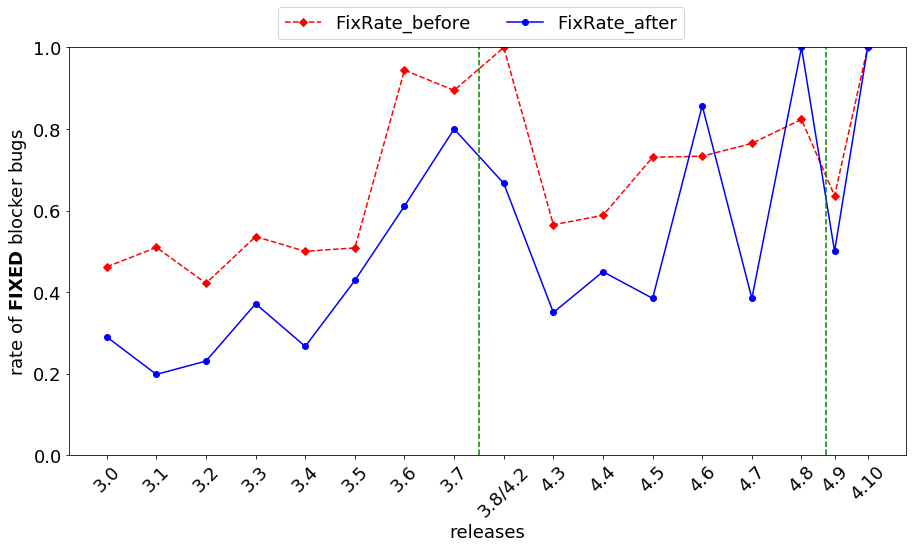

In [12]:
tdata = sev_df_yearly_stats_first.copy()
tdata = tdata.drop_duplicates()

x = get_x_axis_tick_placement()

for severity in tdata.severity.unique():
    fig, ax = plt.subplots()
    
    data = tdata[tdata['severity']==severity]

    data = sort_df(data,'version')

    data['label'] = ''
    for index,row in data.iterrows():
        rel = row['version']
        date = relase_creation_ts_all[rel]
        date = date[:date.find(' ')]
        date = date[:date.rfind('-')]
        if rel=='4.2':
            rel='3.8/4.2'
        data.loc[index,'label'] = rel

    data = data.set_index('version')
    fig.set_figheight(7.5)
    fig.set_figwidth(15)

    ax.plot(x,data[['Ratio_F_B']],label='FixRate_before',color='red',marker='D',linestyle='--')
    ax.plot(x,data[['Ratio_F_A']],label='FixRate_after',color='blue',marker='o',linestyle='-')

    ax.legend(fontsize=18, bbox_to_anchor=(0.25, 1.10), loc=2, ncol=2, borderaxespad=0.)
    plt.xlabel('releases', fontsize=18)
    plt.ylabel('rate of ' + r"$\it{" + r"\bf{"+ 'FIXED' +  "}"+ "}$" +' '+ severity + ' bugs', fontsize=18)

    plt.axvline(x=14.5, c='g',linestyle='--')
    plt.axvline(x=7.5, c='g',linestyle='--')

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(18) 
        tick.label.set_rotation(45)

    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(18) 
    plt.xticks(x, data.label.values.tolist())
    plt.ylim(0,1)
    plt.show()
    ax.get_figure().savefig('..'+os.sep+'paper'+os.sep+'figs'+os.sep+'RQ1'+os.sep+'fix_before_after_sev='+str(severity)+'.pdf', bbox_inches="tight")

At least one sample not normally distributed
Statistically significant difference NOT found
RanksumsResult(statistic=1.515515407402428, pvalue=0.129641931500049)


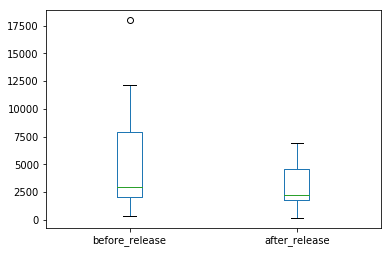

In [13]:
tt = df_yearly_stats_first[['after_release','before_release']]
compare_distributions(tt,'before_release', 'after_release')

In [14]:
target_monthly_file = '.'+os.sep+'data'+os.sep+'RQ1'+os.sep+'year_releases_monthly_stats_first_assign_last_resolve_fix.csv'
if not os.path.exists(target_monthly_file):
    df_y_monthly_first = get_monthly_stats(df,assignedFirst=True,resolvedFirst=False,fixedFirst=False)
    df_y_monthly_first.to_csv(target_monthly_file,index=False)
else:
    df_y_monthly_first = pd.read_csv(target_monthly_file,index_col=False,
                                    dtype={'release': str})

df_y_monthly_first['release'] = df_y_monthly_first['release'].astype(str)

df_y_monthly_first.head()

,id,release,Product,type,start_period,end_period,month,period
0,64612,3.0,Platform,reported,2004-05-26,2004-06-25,1,before
1,64613,3.0,Platform,reported,2004-05-26,2004-06-25,1,before
2,64614,3.0,Platform,reported,2004-05-26,2004-06-25,1,before
3,64617,3.0,Platform,reported,2004-05-26,2004-06-25,1,before
4,64621,3.0,Platform,reported,2004-05-26,2004-06-25,1,before


In [15]:
target_monthly_file1 = '.'+os.sep+'data'+os.sep+'RQ1'+os.sep+'sev_year_releases_monthly_stats_first_assign_last_resolve_fix.csv'
if not os.path.exists(target_monthly_file1):
    sev_df_y_monthly_first = get_monthly_stats_severity(df,assignedFirst=True,resolvedFirst=False,fixedFirst=False)
    sev_df_y_monthly_first.to_csv(target_monthly_file1,index=False)
else:
    sev_df_y_monthly_first = pd.read_csv(target_monthly_file1,index_col=False,
                                    dtype={'release': str})

sev_df_y_monthly_first['release'] = sev_df_y_monthly_first['release'].astype(str)
sev_df_y_monthly_first.head()

,id,release,Product,type,start_period,end_period,month,period,severity
0,468284,4.5,Platform,reported,2015-05-25 20:00:00,2015-06-24 20:00:00,1,before,normal
1,468291,4.5,Platform,reported,2015-05-25 20:00:00,2015-06-24 20:00:00,1,before,normal
2,468307,4.5,Platform,reported,2015-05-25 20:00:00,2015-06-24 20:00:00,1,before,normal
3,468324,4.5,Platform,reported,2015-05-25 20:00:00,2015-06-24 20:00:00,1,before,normal
4,468325,4.5,Platform,reported,2015-05-25 20:00:00,2015-06-24 20:00:00,1,before,normal


In [16]:
#There is no zero month because it is confusing for the figures to have two zero values.
df_y_monthly = df_y_monthly_first[df_y_monthly_first['month']<=12]
df_y_monthly

,id,release,Product,type,start_period,end_period,month,period
0,64612,3.0,Platform,reported,2004-05-26,2004-06-25,1,before
1,64613,3.0,Platform,reported,2004-05-26,2004-06-25,1,before
2,64614,3.0,Platform,reported,2004-05-26,2004-06-25,1,before
3,64617,3.0,Platform,reported,2004-05-26,2004-06-25,1,before
4,64621,3.0,Platform,reported,2004-05-26,2004-06-25,1,before
5,64624,3.0,Platform,reported,2004-05-26,2004-06-25,1,before
6,64625,3.0,Platform,reported,2004-05-26,2004-06-25,1,before
7,64626,3.0,Platform,reported,2004-05-26,2004-06-25,1,before
8,64627,3.0,Platform,reported,2004-05-26,2004-06-25,1,before
9,64628,3.0,Platform,reported,2004-05-26,2004-06-25,1,before


In [17]:
sev_df_y_monthly_first = sev_df_y_monthly_first[sev_df_y_monthly_first['month']<=12]
sev_df_y_monthly_first

,id,release,Product,type,start_period,end_period,month,period,severity
0,468284,4.5,Platform,reported,2015-05-25 20:00:00,2015-06-24 20:00:00,1,before,normal
1,468291,4.5,Platform,reported,2015-05-25 20:00:00,2015-06-24 20:00:00,1,before,normal
2,468307,4.5,Platform,reported,2015-05-25 20:00:00,2015-06-24 20:00:00,1,before,normal
3,468324,4.5,Platform,reported,2015-05-25 20:00:00,2015-06-24 20:00:00,1,before,normal
4,468325,4.5,Platform,reported,2015-05-25 20:00:00,2015-06-24 20:00:00,1,before,normal
5,468327,4.5,Platform,reported,2015-05-25 20:00:00,2015-06-24 20:00:00,1,before,normal
6,468328,4.5,Platform,reported,2015-05-25 20:00:00,2015-06-24 20:00:00,1,before,normal
7,468330,4.5,Platform,reported,2015-05-25 20:00:00,2015-06-24 20:00:00,1,before,normal
8,468352,4.5,Platform,reported,2015-05-25 20:00:00,2015-06-24 20:00:00,1,before,normal
9,468380,4.5,Platform,reported,2015-05-25 20:00:00,2015-06-24 20:00:00,1,before,normal


In [18]:
all_stats = pd.DataFrame()
for period_type in df_y_monthly.period.unique():
    pdf_y_monthly = df_y_monthly[df_y_monthly['period']==period_type]

    res_d = (
        pdf_y_monthly[pdf_y_monthly['type']=='resolved']
        .groupby(by=['release','month'])['id']
        .nunique()
        .reset_index()
        .rename(index=str,columns={'id':'resolved_bugs'})
    )
    ass_d = (
        pdf_y_monthly[pdf_y_monthly['type']=='assigned']
        .groupby(by=['release','month'])['id']
        .nunique()
        .reset_index()
        .rename(index=str,columns={'id':'assigned_bugs'})
    )
    rep_d = (
        pdf_y_monthly[pdf_y_monthly['type']=='reported']
        .groupby(by=['release','month'])['id']
        .nunique()
        .reset_index()
        .rename(index=str,columns={'id':'reported_bugs'})
    )
    bugs_resolved = (
        pdf_y_monthly[pdf_y_monthly['type']=='resolved'].id.unique()
    )
    fix_d = (
        pdf_y_monthly[pdf_y_monthly['type']=='fixed']
        .groupby(by=['release','month'])['id']
        .nunique()
        .reset_index()
        .rename(index=str,columns={'id':'fixed_bugs'})
    )


    pdf_y_m_stats = pd.merge(res_d,rep_d,on=['release','month'],how='outer')
    pdf_y_m_stats = pd.merge(pdf_y_m_stats,ass_d,on=['release','month'],how='outer')
    pdf_y_m_stats = pd.merge(pdf_y_m_stats,fix_d,on=['release','month'],how='outer')

    pdf_y_m_stats['non_resolved_bugs_so_far'] = 0

    for index,row in pdf_y_monthly[['month','release','start_period']].drop_duplicates().iterrows():
        sdate = row['start_period']
        month = row['month']
        release = row['release']
        non_resolved_so_far = pdf_y_monthly[(pdf_y_monthly['start_period']<=sdate) &
                                            (pdf_y_monthly['release']==release) &
                                          (~pdf_y_monthly['id'].isin(bugs_resolved))]

        pdf_y_m_stats.loc[(pdf_y_m_stats['month']==month) & (pdf_y_m_stats['release']==release),'non_resolved_bugs_so_far'] = len(non_resolved_so_far.id.unique())
        
    pdf_y_m_stats['period'] = period_type
    all_stats = all_stats.append(pdf_y_m_stats)
all_stats['release'] = all_stats['release'].astype(str)
all_stats = all_stats.fillna(0)

all_stats['res_rate'] = all_stats['resolved_bugs']/(all_stats['reported_bugs']+all_stats['non_resolved_bugs_so_far'])
all_stats['fix_rate'] = all_stats['fixed_bugs']/all_stats['resolved_bugs']

#error checking
print(all_stats.res_rate.max())

#error checking
print(all_stats.fix_rate.max())

all_stats

0.6371249127704117
1.0


,release,month,resolved_bugs,reported_bugs,assigned_bugs,fixed_bugs,non_resolved_bugs_so_far,period,res_rate,fix_rate
0,3.0,1,2843.0,3203.0,1058.0,1445.0,3711,before,0.411195,0.508266
1,3.0,2,2770.0,2792.0,946.0,1613.0,2523,before,0.521167,0.582310
2,3.0,3,1492.0,1935.0,646.0,800.0,1924,before,0.386629,0.536193
3,3.0,4,1609.0,2133.0,726.0,860.0,1505,before,0.442276,0.534493
4,3.0,5,1072.0,1553.0,527.0,559.0,1141,before,0.397921,0.521455
5,3.0,6,541.0,727.0,319.0,299.0,865,before,0.339824,0.552680
6,3.0,7,728.0,908.0,333.0,446.0,734,before,0.443362,0.612637
7,3.0,8,796.0,1136.0,449.0,457.0,592,before,0.460648,0.574121
8,3.0,9,744.0,1038.0,444.0,395.0,447,before,0.501010,0.530914
9,3.0,10,613.0,811.0,338.0,365.0,301,before,0.551259,0.595432


In [ ]:
sev_all_stats = pd.DataFrame()
for period_type in sev_df_y_monthly_first.period.unique():
    pdf_y_monthly = sev_df_y_monthly_first[sev_df_y_monthly_first['period']==period_type]

    res_d = (
        pdf_y_monthly[pdf_y_monthly['type']=='resolved']
        .groupby(by=['release','month','severity'])['id']
        .nunique()
        .reset_index()
        .rename(index=str,columns={'id':'resolved_bugs'})
    )
    ass_d = (
        pdf_y_monthly[pdf_y_monthly['type']=='assigned']
        .groupby(by=['release','month','severity'])['id']
        .nunique()
        .reset_index()
        .rename(index=str,columns={'id':'assigned_bugs'})
    )
    rep_d = (
        pdf_y_monthly[pdf_y_monthly['type']=='reported']
        .groupby(by=['release','month','severity'])['id']
        .nunique()
        .reset_index()
        .rename(index=str,columns={'id':'reported_bugs'})
    )
    bugs_resolved = (
        pdf_y_monthly[pdf_y_monthly['type']=='resolved'].id.unique()
    )
    fix_d = (
        pdf_y_monthly[pdf_y_monthly['type']=='fixed']
        .groupby(by=['release','month','severity'])['id']
        .nunique()
        .reset_index()
        .rename(index=str,columns={'id':'fixed_bugs'})
    )


    pdf_y_m_stats = pd.merge(res_d,rep_d,on=['release','month','severity'],how='outer')
    pdf_y_m_stats = pd.merge(pdf_y_m_stats,ass_d,on=['release','month','severity'],how='outer')
    pdf_y_m_stats = pd.merge(pdf_y_m_stats,fix_d,on=['release','month','severity'],how='outer')

    pdf_y_m_stats['non_resolved_bugs_so_far'] = 0

    for index,row in pdf_y_monthly[['month','release','severity','start_period']].drop_duplicates().iterrows():
        sdate = row['start_period']
        month = row['month']
        release = row['release']
        severity = row['severity']
        bugs_resolved_so_far = pdf_y_monthly[(pdf_y_monthly['start_period']<=sdate) &
                                            (pdf_y_monthly['release']==release) &
                                           (pdf_y_monthly['severity']==severity) &
                                             (pdf_y_monthly['type']=='resolved')]
        
        
        
        non_resolved_so_far = pdf_y_monthly[(pdf_y_monthly['start_period']<=sdate) &
                                            (pdf_y_monthly['release']==release) &
                                          (~pdf_y_monthly['id'].isin(bugs_resolved_so_far)) &
                                           (pdf_y_monthly['severity']==severity)]

        pdf_y_m_stats.loc[(pdf_y_m_stats['month']==month) & 
                          (pdf_y_m_stats['release']==release) &
                            (pdf_y_m_stats['severity']==severity)
                          ,'non_resolved_bugs_so_far'] = len(non_resolved_so_far.id.unique())
        
    pdf_y_m_stats['period'] = period_type
    sev_all_stats = sev_all_stats.append(pdf_y_m_stats,ignore_index=True)
sev_all_stats['release'] = sev_all_stats['release'].astype(str)

sev_all_stats = sev_all_stats.fillna(0)

sev_all_stats['res_rate'] = sev_all_stats['resolved_bugs']/(sev_all_stats['reported_bugs']+sev_all_stats['non_resolved_bugs_so_far'])
sev_all_stats['fix_rate'] = sev_all_stats['fixed_bugs']/sev_all_stats['resolved_bugs']
sev_all_stats.loc[sev_all_stats['res_rate']==np.inf,'res_rate']=0
sev_all_stats.loc[sev_all_stats['res_rate'].isna(),'res_rate']=0
sev_all_stats.loc[sev_all_stats['fix_rate']==np.inf,'fix_rate']=0
sev_all_stats.loc[sev_all_stats['fix_rate'].isna(),'fix_rate']=0


#error checking
print(sev_all_stats.res_rate.max())

#error checking
sev_all_stats.loc[sev_all_stats['fix_rate']>1,'fix_rate']=1
print(sev_all_stats.fix_rate.max())

sev_all_stats

In [22]:
def get_month_for_unified_figure(x):
    if x['period']=='after':
        month = int(x['month'])
        return month
    befmonth = int(x['month'])
    befmonth = befmonth*(-1)
    return befmonth

figure_labels = {
    "assigned_bugs" : "# assigned bugs",
    "reported_bugs" : "# reported bugs",
    "fixed_bugs" : "# fixed bugs",
    "res_rate" : "ResRate",
    'resolved_bugs' : '# resolved bugs',
    'fix_rate' : 'FixRate'
}

from matplotlib import colors as mcolors


#colors = dict(mcolors.BASE_COLORS, **mcolors.XKCD_COLORS)#TABLEAU_COLORS


# Sort colors by hue, saturation, value and name.
#by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
#                for name, color in colors.items())
#sorted_names = [name for hsv, name in by_hsv]
#sorted_names = [x for x in sorted_names if x!='w']
sorted_names = ['k','b','g','r','c','m','y',
               'tab:pink','darkorange','slateblue',
               'slategrey','tan','orange']
len(sorted_names)

13

reported_bugs
Per major release
Eclipse 3.*
At least one sample not normally distributed
Statistically significant difference found
RanksumsResult(statistic=2.5403411844343533, pvalue=0.011074437676156606)
Eclipse 4.* quarterly
At least one sample not normally distributed
Statistically significant difference NOT found
RanksumsResult(statistic=-0.32025630761017426, pvalue=0.7487740417065472)
Eclipse 4.* yearly
At least one sample not normally distributed
Statistically significant difference NOT found
RanksumsResult(statistic=1.7320508075688772, pvalue=0.0832645166635504)
Per release
reported_bugs
At least one sample not normally distributed
Statistically significant difference NOT found
RanksumsResult(statistic=1.8771724932598257, pvalue=0.06049445622134112)


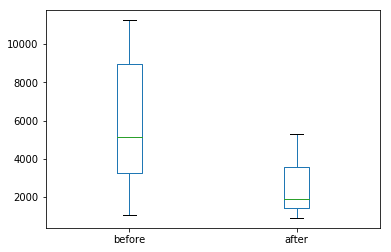

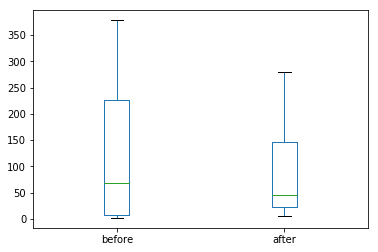

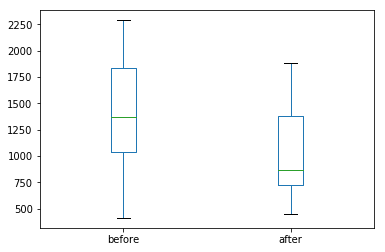

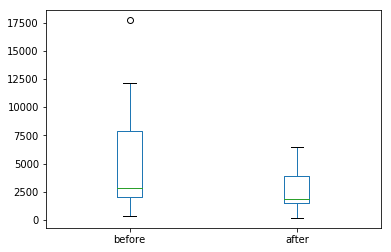

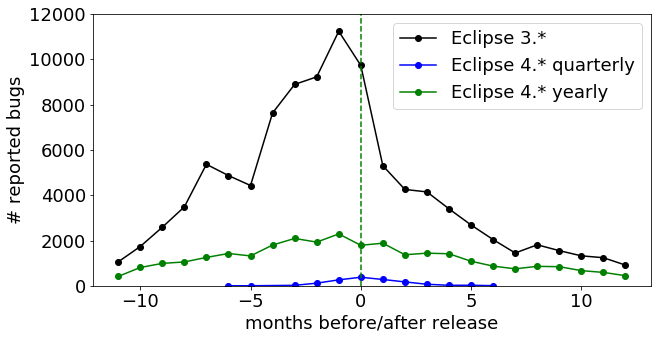

assigned_bugs
Per major release
Eclipse 3.*
At least one sample not normally distributed
Statistically significant difference found
RanksumsResult(statistic=2.5403411844343533, pvalue=0.011074437676156606)
Eclipse 4.* quarterly
At least one sample not normally distributed
Statistically significant difference NOT found
RanksumsResult(statistic=-0.40032038451271784, pvalue=0.6889205558044607)
Eclipse 4.* yearly
At least one sample not normally distributed
Statistically significant difference NOT found
RanksumsResult(statistic=1.0969655114602888, pvalue=0.27265646879500405)
Per release
assigned_bugs
At least one sample not normally distributed
Statistically significant difference NOT found
RanksumsResult(statistic=1.4982936414092185, pvalue=0.1340569753965103)


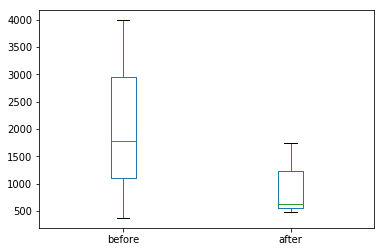

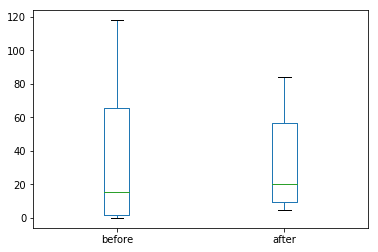

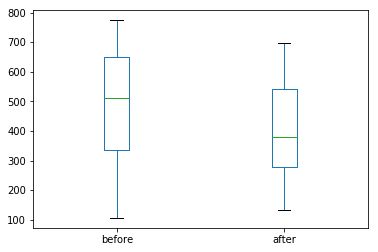

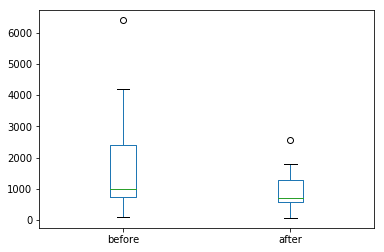

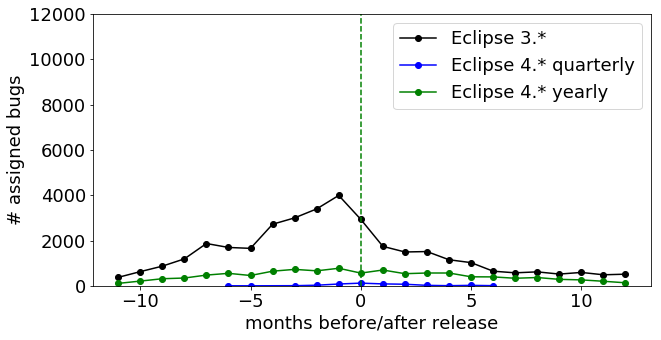

resolved_bugs
Per major release
Eclipse 3.*
At least one sample not normally distributed
Statistically significant difference NOT found
RanksumsResult(statistic=1.5588457268119895, pvalue=0.11903289845700783)
Eclipse 4.* quarterly
At least one sample not normally distributed
Statistically significant difference NOT found
RanksumsResult(statistic=-0.8006407690254357, pvalue=0.42333964158244364)
Eclipse 4.* yearly
At least one sample not normally distributed
Statistically significant difference NOT found
RanksumsResult(statistic=0.8660254037844386, pvalue=0.3864762307712327)
Per release
resolved_bugs
At least one sample not normally distributed
Statistically significant difference NOT found
RanksumsResult(statistic=1.3949630454499622, pvalue=0.16302698366840085)


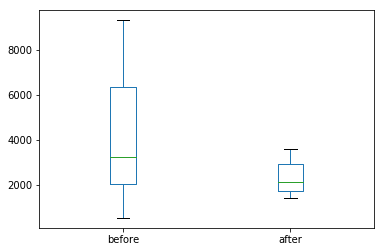

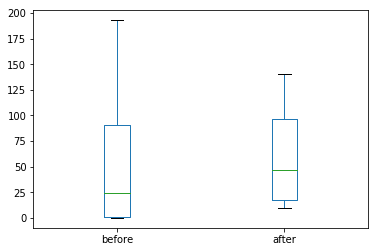

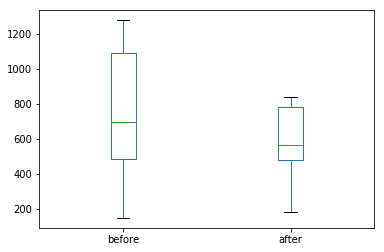

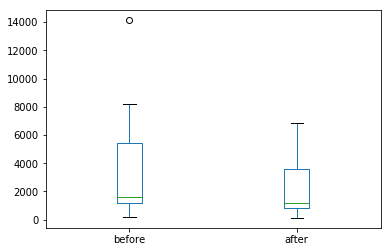

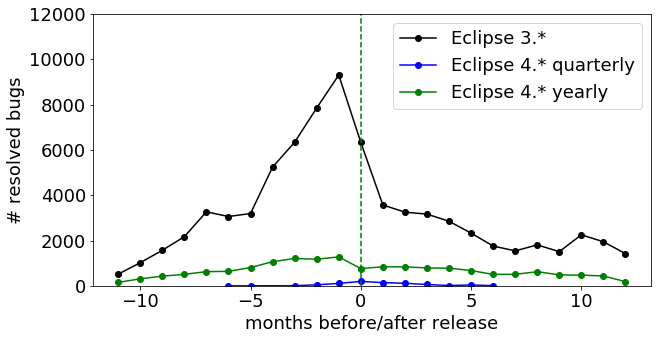

fixed_bugs
Per major release
Eclipse 3.*
At least one sample not normally distributed
Statistically significant difference found
RanksumsResult(statistic=2.309401076758503, pvalue=0.02092133533779403)
Eclipse 4.* quarterly
At least one sample not normally distributed
Statistically significant difference NOT found
RanksumsResult(statistic=-0.8006407690254357, pvalue=0.42333964158244364)
Eclipse 4.* yearly
At least one sample not normally distributed
Statistically significant difference NOT found
RanksumsResult(statistic=1.212435565298214, pvalue=0.2253456937016668)
Per release
fixed_bugs
At least one sample not normally distributed
Statistically significant difference found
RanksumsResult(statistic=1.980503089219082, pvalue=0.04764702656545125)


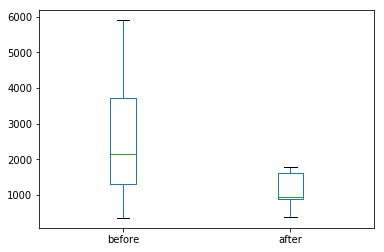

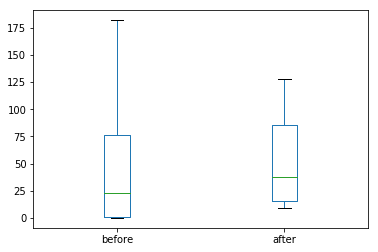

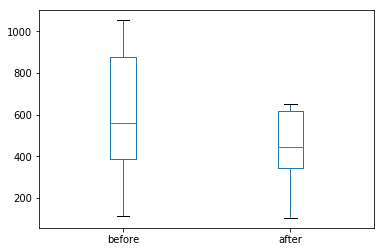

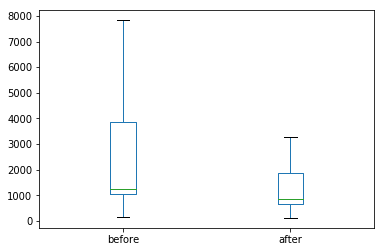

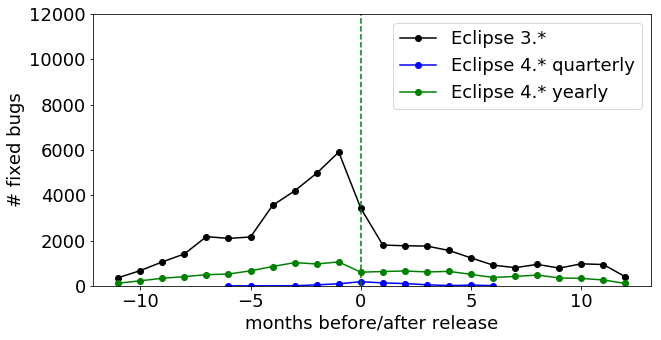

In [55]:
varslist = ['reported_bugs','assigned_bugs','resolved_bugs','fixed_bugs']

#from matplotlib.pyplot import *

for var in varslist:
    print(var)
    print('Per major release')
    data = all_stats.copy()
    data['major_release'] = data.apply(lambda x: get_major_label(x['release']), axis=1)

    data = data[['release','month','period',var,'major_release']] 
    dat = data.groupby(by=['major_release','period','month'])[var].sum().reset_index()

    
    for mrel in dat.major_release.unique():    
        print(mrel)
        tt = pd.DataFrame()
        tt[var1]=dat[(dat['major_release']==mrel) & (dat['period']==var1)][var].values.tolist()
        tt[var2]=dat[(dat['major_release']==mrel) & (dat['period']==var2)][var].values.tolist()

        
        #tt = tt.append({'major_release':mrel,
        #               var1:dat[(dat['major_release']==mrel) & (dat['period']==var1)][var].values.tolist(),
        #               var2:dat[(dat['major_release']==mrel) & (dat['period']==var2)][var].values.tolist()},
        #               ignore_index=True)

        compare_distributions(tt,var1,var2)
    
    print('Per release')
    data = all_stats.copy()
    data = data[['release','month','period',var]] 

    dat = data.groupby(by=['release','period'])[var].sum().reset_index()
    var1 = 'before'
    var2 = 'after'
    tt = pd.DataFrame()
    for release in dat.release.unique():    
        tt = tt.append({'release':release,
                       var1:dat[(dat['release']==release) & (dat['period']==var1)][var].sum(),
                       var2:dat[(dat['release']==release) & (dat['period']==var2)][var].sum()},
                       ignore_index=True)
    print(var)
    compare_distributions(tt,var1,var2)

    data = all_stats.copy()
    data['month'] = data.apply(lambda x : get_month_for_unified_figure(x),axis=1)
    data = data[['release','month',var]] 
    data = data.sort_values(by=['release','month'])

    def get_major_label(release):
        if release.find('3.')>=0:
            return 'Eclipse 3.*'

        if release=='4.9' or release=='4.10':
            return 'Eclipse 4.* quarterly'
        return 'Eclipse 4.* yearly'

    data['major_release'] = data.apply(lambda x: get_major_label(x['release']), axis=1)

    data['month'] = data.apply(lambda x: x['month']+1 if x['month']<0 else x['month'], axis=1)

    data= data.groupby(by=['major_release','month'])[var].sum().reset_index()


    plt.figure(figsize=(10,5))
    c=0
    for rel in data.major_release.unique().tolist():
        ax = plt.gca()
        value = data[(data['major_release']==rel)].drop_duplicates()

        #value = sort_df(value,'release',sort_values)
        value.plot(x='month',y=var,label=rel,ax=ax,color=sorted_names[c],marker='o')
        c+=1

    plt.axvline(x=0, c='g',linestyle='--')
    plt.ylabel(figure_labels[var],fontsize=18)
    plt.xlabel('months before/after release',fontsize=18)

    plt.ylim(0,12000)

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(18) 

    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(18) 

    legend(fontsize=18,  loc=1)#,bbox_to_anchor=(0.28, 1.17),ncol=4,,  borderaxespad=0.

    plt.show()

    ax.get_figure().savefig('..'+os.sep+'paper'+os.sep+'figs'+os.sep+'rq1_monthly_'+var+'.pdf', bbox_inches="tight")

In [39]:
dat

,major_release,period,month,reported_bugs
0,Eclipse 3.*,after,1,5302.0
1,Eclipse 3.*,after,2,4254.0
2,Eclipse 3.*,after,3,4145.0
3,Eclipse 3.*,after,4,3397.0
4,Eclipse 3.*,after,5,2685.0
5,Eclipse 3.*,after,6,2040.0
6,Eclipse 3.*,after,7,1449.0
7,Eclipse 3.*,after,8,1810.0
8,Eclipse 3.*,after,9,1552.0
9,Eclipse 3.*,after,10,1323.0


In [ ]:
: df.plot.area(stacked=False);
    

In [ ]:
df_y_monthly_first.head()


In [ ]:
df['release'] = df['release'].astype(str)

rq1_rates = pd.DataFrame()

for release in df.release.unique():
    start_date = relase_creation_ts_all[release]
    start_date = pd.to_datetime(start_date)

    dfrelease = df[df['release']==release]
    dfrelease = trans_to_datetime(dfrelease,['last_resolved_date','last_fixed_date','creation_time'])
    resolved_before = dfrelease[(dfrelease['is_resolved']==1) & (dfrelease['creation_time']<start_date)]
    resolved_after = dfrelease[(dfrelease['is_resolved']==1) & (dfrelease['creation_time']>=start_date)]
    
    reported_before = dfrelease[(dfrelease['creation_time']<start_date)]
    reported_after = dfrelease[(dfrelease['creation_time']>=start_date)]
    
    #non_resolved_before = dfrelease[ (dfrelease['is_resolved']==0)]
    non_resolved_after = dfrelease[(dfrelease['is_resolved']==0) ]#(dfrelease['creation_ts']<start_date) &
    
    #fixed_before = dfrelease[(dfrelease['is_fixed']==1) & (dfrelease['last_fixed_date']<start_date) 
                           # & (dfrelease['creation_ts']<start_date)]
    #fixed_after = dfrelease[(dfrelease['is_fixed']==1) & (dfrelease['last_fixed_date']>=start_date)]
    fixed_before = resolved_before[(resolved_before['is_fixed']==1)  & (resolved_before['last_fixed_date']<start_date) ]
    fixed_after = resolved_after[(resolved_after['is_fixed']==1) & (resolved_after['last_fixed_date']>=start_date)]
    
    rq1_rates = rq1_rates.append({
        'release':release,
        'resolved_before':len(resolved_before),
        'resolved_after':len(resolved_after),
        'reported_before':len(reported_before),
        'reported_after':len(reported_after),
        'non_resolved_before':0,#len(non_resolved_before)
        'non_resolved_after':len(non_resolved_after),
        'fixed_before':len(fixed_before),
        'fixed_after':len(fixed_after)
    },ignore_index=True)
rq1_rates['release'] = rq1_rates['release'].astype(str)
rq1_rates

In [ ]:
# THERE IS SOMETHING WRONG HERE, RATIOS CAN BE >1
rq1_rates['res_rate_before'] = rq1_rates['resolved_before']/(rq1_rates['reported_before']+rq1_rates['non_resolved_before'])
rq1_rates['res_rate_after'] = rq1_rates['resolved_after']/(rq1_rates['reported_after']+rq1_rates['non_resolved_after'])

rq1_rates['fix_rate_before'] =rq1_rates['fixed_before']/rq1_rates['resolved_before']
rq1_rates['fix_rate_after'] = rq1_rates['fixed_after']/rq1_rates['resolved_after']

In [ ]:
rq1_rates

In [ ]:
all_stats.sort_values(by='res_rate')

In [ ]:
import statistics

from matplotlib.pyplot import *
import scipy.stats as stats

var = 'fix_rate'

data = all_stats.copy()
data = data[['release','month','period',var]] 


var1 = 'before'
var2 = 'after'

test_results = pd.DataFrame()
for release in data.release.unique():
    drel = data[data['release']==release]
    
    before_values = drel[drel['period']=='before'][var].values.tolist()
    after_values = drel[drel['period']=='after'][var].values.tolist()
    
    anova_result = stats.f_oneway(before_values,
                   after_values)
    test_results = test_results.append({'pvalue':anova_result.pvalue,
                                        'statistic':anova_result.statistic,
                                        'release':release,
                                        'before_median':statistics.median(before_values),
                                        'after_median':statistics.median(after_values),
                                       },ignore_index=True)

test_results['significant'] = 'NO'
test_results.loc[test_results['pvalue']<0.05,'significant']='YES'

print(test_results)


data = all_stats.copy()
data['month'] = data.apply(lambda x : get_month_for_unified_figure(x),axis=1)
data = data[['release','month',var]] 
data = data.sort_values(by=['release','month'])

data['major_release'] = ''
data.loc[data['release'].str.find('3.')==0,'major_release'] = 3
data.loc[data['release'].str.find('4.')==0,'major_release'] = 4

for majorrel in data.major_release.unique():
    plt.figure(figsize=(10,5))
    c=0
    tdata = data.copy()
    tdata = tdata[tdata['major_release']==majorrel]
    tdata = sort_df(tdata,'release')
    for rel in tdata.release.unique().tolist():
        ax = plt.gca()
        value = tdata[tdata['release']==rel]
        value = value.sort_values(by='month',ascending=True)
        value.plot(x='month',y=var,label=rel,ax=ax,color=sorted_names[c],marker='o')
        c+=1
    plt.axvline(x=0, c='r')
    plt.ylabel(figure_labels[var],fontsize=18)
    plt.xlabel('months before/after release',fontsize=18)
    
    plt.ylim(0,1)
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(16) 

    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(16) 
        
    legend(fontsize=15, bbox_to_anchor=(0.2, 1.28), loc=2, ncol=4, borderaxespad=0.)
    plt.show()

In [ ]:
import statistics

from matplotlib.pyplot import *
import scipy.stats as stats

var = 'res_rate'

data = all_stats.copy()
data = data[['release','month','period',var]] 


var1 = 'before'
var2 = 'after'

test_results = pd.DataFrame()
for release in data.release.unique():
    drel = data[data['release']==release]
    
    before_values = drel[drel['period']=='before'][var].values.tolist()
    after_values = drel[drel['period']=='after'][var].values.tolist()
    
    anova_result = stats.f_oneway(before_values,
                   after_values)
    test_results = test_results.append({'pvalue':anova_result.pvalue,
                                        'statistic':anova_result.statistic,
                                        'release':release,
                                        'before_median':statistics.median(before_values),
                                        'after_median':statistics.median(after_values),
                                       },ignore_index=True)

test_results['significant'] = 'NO'
test_results.loc[test_results['pvalue']<0.05,'significant']='YES'

print(test_results)


data = all_stats.copy()
data['month'] = data.apply(lambda x : get_month_for_unified_figure(x),axis=1)
data = data[['release','month',var]] 
data = data.sort_values(by=['release','month'])

data['major_release'] = ''
data.loc[data['release'].str.find('3.')==0,'major_release'] = 3
data.loc[data['release'].str.find('4.')==0,'major_release'] = 4

for majorrel in data.major_release.unique():
    plt.figure(figsize=(10,5))
    c=0
    tdata = data.copy()
    tdata = tdata[tdata['major_release']==majorrel]
    tdata = sort_df(tdata,'release')
    for rel in tdata.release.unique().tolist():
        ax = plt.gca()
        value = tdata[tdata['release']==rel]
        value = value.sort_values(by='month',ascending=True)
        value.plot(x='month',y=var,label=rel,ax=ax,color=sorted_names[c],marker='o')
        c+=1
    plt.axvline(x=0, c='r')
    plt.ylabel(figure_labels[var],fontsize=18)
    plt.xlabel('months before/after release',fontsize=18)
    
    plt.ylim(0,1)
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(16) 

    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(16) 
        
    legend(fontsize=15, bbox_to_anchor=(0.2, 1.28), loc=2, ncol=4, borderaxespad=0.)
    plt.show()